# Correlation WAMEX Drillhole

10% of the entire data due to large volume of entire data (8 GB). We use the WAMEX Drillhole assays that were within 15km of the relevant MINEDEX sites, remove obvious outliers and observe highest/lowest correlations involving the CM, as well as correlations between the CM and MINEDEX commodities available for the relevant MINEDEX sites. 

In [54]:
def replace_neg9999(val):
    if val == -9999: 
        return 0
    else:
        return val
    
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)
    
    return df

## Cobalt

In [6]:
Merged_Ni_Drillhole_lessthan15km = pd.read_csv('Merged_Ni_Drillhole_lessthan15km.csv')

In [7]:
#remove duplicates
df_Co = Merged_Ni_Drillhole_lessthan15km.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Latitude', 'Longitude', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

In [8]:
df_Co = df_Co.drop_duplicates()
df_Co.head()

,CollarId,CompanyHoleId,HoleType,Azimuth,Dip,MaxDepth,Anumber,SampleId,CompanySampleId,FromDepth,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lat,wamex_lon
0,868290,AMD352,DD,360,-90,338.6,79089,18042279,CD011299,86.0,...,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0,-27.606633,120.573672
18,868286,AMD348,DD,360,-90,377.9,79089,18040715,1156461,287.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,7.0,-9999.0,-27.606633,120.573672
36,868288,AMD350,DD,360,-90,374.8,79089,18041566,CD013428,211.0,...,-9999.0,-9999.0,-9999.0,-9999.0,50.0,-9999.0,-5.0,-9999.0,-27.606633,120.573672
54,868287,AMD349,DD,360,-90,349.3,79089,18041158,1158442,217.0,...,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,12.0,-9999.0,-27.606633,120.573672
72,868286,AMD348,DD,360,-90,377.9,79089,18040407,1156228,92.0,...,-9999.0,-9999.0,-9999.0,-9999.0,50.0,-9999.0,-5.0,-9999.0,-27.606633,120.573672


In [9]:
df_Co.shape

(80815, 171)

In [10]:
df_Co.isna().sum().sum()

2775

In [11]:
#change NAs to 0
df_Co = df_Co.fillna(0)

In [12]:
#only keep ppm columns
df_Co_ppm = df_Co.filter(like='PPM')

In [13]:
#also keep coordonates
df_Co_ppm['wamex_lon'] = df_Co['wamex_lon']
df_Co_ppm['wamex_lat'] = df_Co['wamex_lat']

In [14]:
df_minerals = df_Co_ppm.drop(columns=['wamex_lat', 'wamex_lon'])

df_Co_ppm.loc[:, df_minerals.columns] = clean_assays(df_Co_ppm.loc[:,df_minerals.columns])
df_Co_ppm.shape

(80815, 160)

In [15]:
df_Co_ppm = df_Co_ppm.drop_duplicates()
df_Co_ppm.shape

(80587, 160)

In [16]:
df_Co_ppm[df_Co_ppm['Ni_PPM'] > 300000].shape

(420, 160)

In [17]:
df_Co_ppm = df_Co_ppm[df_Co_ppm['Ni_PPM'] < 300000]

<AxesSubplot:>

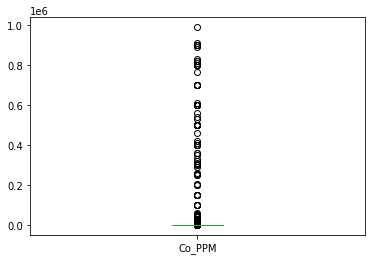

In [18]:
df_Co_ppm['Co_PPM'].plot(kind='box')

In [27]:
df_Co_ppm.shape

(80166, 160)

In [19]:
df_Co_corr = df_Co_ppm.corr()

In [20]:
only_co = df_Co_corr['Co_PPM'].sort_values()

In [21]:
only_co[0:5]

wamex_lat   -0.015339
V_PPM       -0.011827
Sr_PPM      -0.008000
Ga_PPM      -0.005938
Ba_PPM      -0.004661
Name: Co_PPM, dtype: float64

In [22]:
#the ones before that are NaNs because they are all 0 values in df_Co_ppm
only_co[-72:-62:]

Mg_PPM      0.034541
MgO_PPM     0.044813
V2O5_PPM    0.072368
Pt_PPM      0.094230
Au_PPM      0.116734
Pd_PPM      0.147997
S_PPM       0.148307
Cr_PPM      0.251589
Cu_PPM      0.464750
Co_PPM      1.000000
Name: Co_PPM, dtype: float64

In [23]:
only_minedex_co = df_Co_ppm[['Ni_PPM','Cu_PPM','Co_PPM', 'Pd_PPM', 'Au_PPM','Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'wamex_lon', 'wamex_lat']].corr()

In [24]:
only_minedex_co['dataframe'] = 'WAMEX Drillhole'

In [25]:
only_minedex_co

,Ni_PPM,Cu_PPM,Co_PPM,Pd_PPM,Au_PPM,Pt_PPM,Rh_PPM,Fe_PPM,S_PPM,Ag_PPM,wamex_lon,wamex_lat,dataframe
Ni_PPM,1.000000,0.006320,0.004832,0.010354,-0.004400,0.081258,0.082897,-0.019564,0.043968,-0.021845,0.019488,-0.063787,WAMEX Drillhole
Cu_PPM,0.006320,1.000000,0.464750,0.016004,0.012569,0.010054,0.000736,-0.001786,0.261783,-0.001799,0.006592,-0.009947,WAMEX Drillhole
Co_PPM,0.004832,0.464750,1.000000,0.147997,0.116734,0.094230,0.000589,-0.002482,0.148307,-0.002558,0.004941,-0.015339,WAMEX Drillhole
Pd_PPM,0.010354,0.016004,0.147997,1.000000,0.753641,0.601264,-0.000071,-0.001076,0.107243,-0.001017,-0.002876,0.004007,WAMEX Drillhole
Au_PPM,-0.004400,0.012569,0.116734,0.753641,1.000000,0.481572,-0.000135,-0.000723,-0.000302,0.015440,-0.010671,0.009242,WAMEX Drillhole
Pt_PPM,0.081258,0.010054,0.094230,0.601264,0.481572,1.000000,-0.000292,-0.001303,0.000834,-0.001229,0.026731,0.012835,WAMEX Drillhole
Rh_PPM,0.082897,0.000736,0.000589,-0.000071,-0.000135,-0.000292,1.000000,-0.001697,-0.000228,-0.001692,0.004234,0.012161,WAMEX Drillhole
Fe_PPM,-0.019564,-0.001786,-0.002482,-0.001076,-0.000723,-0.001303,-0.001697,1.000000,-0.001392,-0.004942,0.018098,-0.061721,WAMEX Drillhole
S_PPM,0.043968,0.261783,0.148307,0.107243,-0.000302,0.000834,-0.000228,-0.001392,1.000000,-0.001397,0.011971,0.001717,WAMEX Drillhole
Ag_PPM,-0.021845,-0.001799,-0.002558,-0.001017,0.015440,-0.001229,-0.001692,-0.004942,-0.001397,1.000000,0.009823,-0.062897,WAMEX Drillhole


In [26]:
only_minedex_co.to_csv('Co_correlations_Drillhole_15km.csv')

## Indium/germanium

In [55]:
Merged_Zn_Drillhole_lessthan15km = pd.read_csv('Merged_Zn_Drillhole_lessthan15km.csv')

#remove duplicates
df_Ge_In = Merged_Zn_Drillhole_lessthan15km.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Latitude', 'Longitude', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_Ge_In = df_Ge_In.drop_duplicates()
df_Ge_In.head()

,CollarId,CompanyHoleId,HoleType,Azimuth,Dip,MaxDepth,Anumber,SampleId,CompanySampleId,FromDepth,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lat,wamex_lon
0,1569256,DED021,DD,360,-90,420.7,86949,36316448,2101007,335.17,...,8.1,-9999.0,-9999.0,-9999.0,782.0,-9999.0,78.1,-9999.0,-28.401474,120.859059
4,1569256,DED021,DD,360,-90,420.7,86949,36316437,2100995,325.00,...,10.8,-9999.0,-9999.0,-9999.0,114.0,-9999.0,20.2,-9999.0,-28.401474,120.859059
8,1569256,DED021,DD,360,-90,420.7,86949,36316353,2100905,195.00,...,19.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,39.1,-9999.0,-28.401474,120.859059
12,1569256,DED021,DD,360,-90,420.7,86949,36316350,2100902,192.00,...,16.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,34.0,-9999.0,-28.401474,120.859059
16,1569256,DED021,DD,360,-90,420.7,86949,36316358,2100911,200.00,...,17.5,-9999.0,-9999.0,-9999.0,76.0,-9999.0,34.4,-9999.0,-28.401474,120.859059


In [56]:
df_Ge_In.shape

(3845, 171)

In [57]:
df_Ge_In.isna().sum().sum()

33

In [58]:
#change NAs to 0
df_Ge_In = df_Ge_In.fillna(0)

In [59]:
#only keep ppm columns
df_Ge_In_ppm = df_Ge_In.filter(like='PPM')

In [60]:
#also keep coordonates
df_Ge_In_ppm['wamex_lon'] = df_Ge_In['wamex_lon']
df_Ge_In_ppm['wamex_lat'] = df_Ge_In['wamex_lat']

In [61]:
df_minerals = df_Ge_In_ppm.drop(columns=['wamex_lat', 'wamex_lon'])

df_Ge_In_ppm.loc[:, df_minerals.columns] = clean_assays(df_Ge_In_ppm.loc[:,df_minerals.columns])
df_Ge_In_ppm.shape

(3845, 160)

In [62]:
df_Ge_In_ppm = df_Ge_In_ppm.drop_duplicates()
df_Ge_In_ppm.shape

(3830, 160)

<AxesSubplot:>

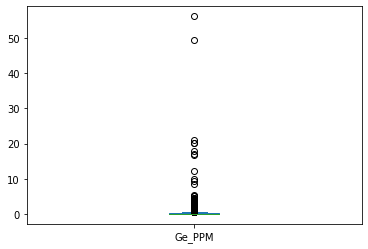

In [43]:
df_Ge_In_ppm['Ge_PPM'].plot(kind='box')

In [63]:
#remove obvious outliers
df_Ge_In_ppm = df_Ge_In_ppm[df_Ge_In_ppm['Ge_PPM'] < 40]

<AxesSubplot:>

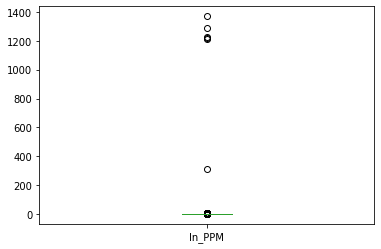

In [45]:
df_Ge_In_ppm['In_PPM'].plot(kind='box')

In [64]:
df_Ge_In_ppm[df_Ge_In_ppm['In_PPM'] > 200]

,Ag_PPM,Al_PPM,Al2O_PPM,Al2O3_PPM,AlO_PPM,As_PPM,As2O3_PPM,AsO_PPM,Au_PPM,B_PPM,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lon,wamex_lat
20691,0.00,422000000.0,0,0.0,0,0.0,0,0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.758701,-31.270813
20723,0.04,806000100.0,0,0.0,0,0.4,0,0,120.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.758701,-31.270813
20851,0.00,695000000.0,0,0.0,0,0.0,0,0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.758701,-31.270813
20883,0.22,0.0,0,0.0,0,0.0,0,0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.758701,-31.270813
20915,0.00,814000000.0,0,0.0,0,0.0,0,0,380.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.758701,-31.270813
31260,0.00,0.0,0,0.0,0,6.3,0,0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,121.765856,-31.377253


In [65]:
df_Ge_In_ppm['In_PPM'].describe()

count    3828.000000
mean        1.833518
std        45.985403
min         0.003000
25%         0.024000
50%         0.046000
75%         0.071000
max      1370.000000
Name: In_PPM, dtype: float64

In [66]:
df_Ge_In_ppm = df_Ge_In_ppm[df_Ge_In_ppm['In_PPM'] < 200]

In [67]:
df_Ge_In_ppm.shape

(3822, 160)

In [68]:
df_corr = df_Ge_In_ppm.corr()

In [69]:
only_ge = df_corr['Ge_PPM'].sort_values()
only_in = df_corr['In_PPM'].sort_values()

In [70]:
only_ge[0:5]

Mn_PPM      -0.143478
Cr_PPM      -0.119106
Ni_PPM      -0.103505
V_PPM       -0.093641
wamex_lon   -0.082443
Name: Ge_PPM, dtype: float64

In [81]:
only_ge[-100:-70]

Cd_PPM       0.145788
Al2O3_PPM    0.146047
K2O_PPM      0.149025
SiO2_PPM     0.156376
Hf_PPM       0.159505
Nb_PPM       0.178030
Au_PPM       0.180925
Ga_PPM       0.181298
Zr_PPM       0.184462
Se_PPM       0.214694
Sm_PPM       0.217789
In_PPM       0.223771
Cs_PPM       0.272683
Li_PPM       0.279465
Rb_PPM       0.285952
Sn_PPM       0.322943
Tm_PPM       0.351192
Er_PPM       0.361449
Tb_PPM       0.373245
Eu_PPM       0.453271
Lu_PPM       0.472754
Ta_PPM       0.496700
Be_PPM       0.519397
Yb_PPM       0.541982
Gd_PPM       0.551100
Ho_PPM       0.576837
W_PPM        0.577693
Dy_PPM       0.623870
Mo_PPM       0.634252
Ge_PPM       1.000000
Name: Ge_PPM, dtype: float64

In [79]:
only_in[0:5]

wamex_lon   -0.137561
Cr_PPM      -0.087398
Sr_PPM      -0.066785
Ba_PPM      -0.029499
Ni_PPM      -0.029226
Name: In_PPM, dtype: float64

In [80]:
only_in[-80:-70]

S_PPM        0.187247
P_PPM        0.206123
Se_PPM       0.207401
Sn_PPM       0.223261
Ge_PPM       0.223771
Cd_PPM       0.242290
wamex_lat    0.254020
Cu_PPM       0.267432
U_PPM        0.294526
In_PPM       1.000000
Name: In_PPM, dtype: float64

In [50]:
Zn_deposits = ['Zn_PPM', 'Ag_PPM', 'Cu_PPM', 'Pb_PPM', 'Au_PPM', 'Co_PPM', 'In_PPM', 'Ge_PPM', 'wamex_lat', 'wamex_lon']
only_minedex = df_Ge_In_ppm[Zn_deposits].corr()

In [51]:
only_minedex

,Zn_PPM,Ag_PPM,Cu_PPM,Pb_PPM,Au_PPM,Co_PPM,In_PPM,Ge_PPM,wamex_lat,wamex_lon
Zn_PPM,1.000000,0.010514,0.006787,0.624282,0.003535,0.396269,-0.003438,0.002522,0.137488,-0.152318
Ag_PPM,0.010514,1.000000,0.159326,0.267053,0.097651,-0.010499,0.050957,0.080407,0.056030,-0.046623
Cu_PPM,0.006787,0.159326,1.000000,0.026148,0.098670,0.094666,0.267432,0.025979,0.241463,-0.245687
Pb_PPM,0.624282,0.267053,0.026148,1.000000,0.014487,0.474432,0.002168,0.028501,0.075615,-0.099747
Au_PPM,0.003535,0.097651,0.098670,0.014487,1.000000,-0.050687,0.026098,0.180925,0.180028,-0.218091
Co_PPM,0.396269,-0.010499,0.094666,0.474432,-0.050687,1.000000,0.102906,-0.035208,0.216896,-0.168010
In_PPM,-0.003438,0.050957,0.267432,0.002168,0.026098,0.102906,1.000000,0.223771,0.254020,-0.137561
Ge_PPM,0.002522,0.080407,0.025979,0.028501,0.180925,-0.035208,0.223771,1.000000,0.040089,-0.082443
wamex_lat,0.137488,0.056030,0.241463,0.075615,0.180028,0.216896,0.254020,0.040089,1.000000,-0.679005
wamex_lon,-0.152318,-0.046623,-0.245687,-0.099747,-0.218091,-0.168010,-0.137561,-0.082443,-0.679005,1.000000


In [52]:
only_minedex.to_csv('GeIn_correlations_Drillhole_15km.csv')